# Import Required Libraries

In [1]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

# Image Agumentation

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img,img_to_array,load_img


#Create an image instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.25,
                            height_shift_range=0.25,
                            shear_range=0.2,
                            zoom_range=0.2,
                            rescale=1./255,
                            horizontal_flip=True,
                            fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Training data fetching from the directory of images

In [3]:
#Training data fetching from the directory of images

batch_size = 16
train_datagen = train_datagen.flow_from_directory('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_5/Veggi_data/Training',
                                                 target_size=(150,150), batch_size=batch_size,
                                                 class_mode='binary')

Found 600 images belonging to 2 classes.


# Testing data fetching from the directory of images

In [4]:
# Testing data fetching from the directory of images

test_datagen= test_datagen.flow_from_directory('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_5/Veggi_data/Testing',
                                                 target_size=(150,150), batch_size=batch_size,
                                                 class_mode='binary')

Found 120 images belonging to 2 classes.


# Build a CNN Model

In [5]:
model = Sequential()

#1st Convolution layer
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Convolution layer
model.add(Conv2D(64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd Convolution Layer
model.add(Conv2D(32,kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#Converting multi dimension to 1d array
model.add(Flatten())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units=1,activation='sigmoid'))

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

# Compile the cnn model

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Run the model

In [10]:
result = model.fit(train_datagen,
                  steps_per_epoch=48//batch_size,epochs=30,
                  validation_data=train_datagen,
                  validation_steps=48//batch_size,
                  )

Epoch 1/30
3/3 [==============================] - 3s 1s/step - loss: 0.4634 - accuracy: 0.7500 - val_loss: 0.2406 - val_accuracy: 0.8542
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 0.2716 - accuracy: 0.8750 - val_loss: 0.3128 - val_accuracy: 0.8750
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 0.2706 - accuracy: 0.9167 - val_loss: 0.2543 - val_accuracy: 0.9167
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 0.3251 - accuracy: 0.8750 - val_loss: 0.3075 - val_accuracy: 0.8750
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 0.2215 - accuracy: 0.9375 - val_loss: 0.1814 - val_accuracy: 0.9792
Epoch 6/30
3/3 [==============================] - 3s 1s/step - loss: 0.2363 - accuracy: 0.8542 - val_loss: 0.1767 - val_accuracy: 0.8958
Epoch 7/30
3/3 [==============================] - 3s 1s/step - loss: 0.2079 - accuracy: 0.9375 - val_loss: 0.3107 - val_accuracy: 0.8333
Epoch 8/30
3/3 [=========================

# Plot for train & test Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


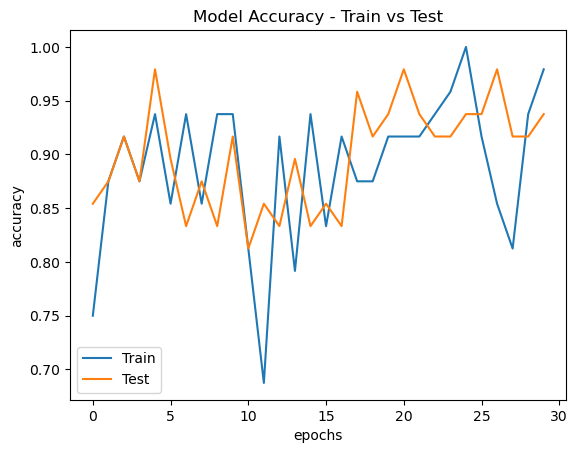

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

print(result.history.keys())

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy - Train vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

# Plot for train & test Loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


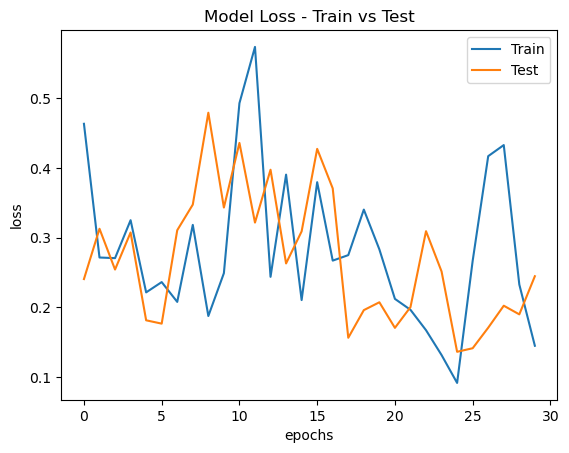

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

print(result.history.keys())

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss - Train vs Test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Test'])
plt.show()

# Run inference on new image

In [13]:
img = load_img('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_5/bean.jpg',
               target_size=(150,150))

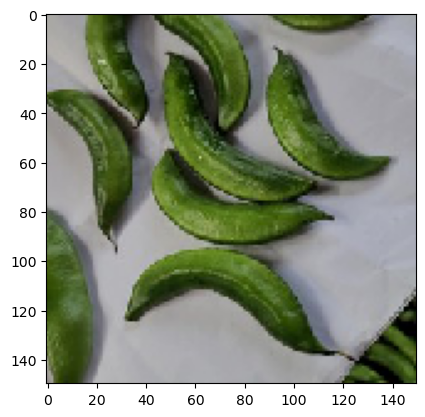

In [14]:
plt.imshow(img)

In [17]:
import tensorflow as tf
import keras

img_array = keras.utils.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

predictions = model.predict(img_array)

score = float(predictions[0])

print(f'This image is {100*(1-score):.2f}% Bean and {100*score:.2f}% Cauliflower.')

1/1 [==============================] - 0s 44ms/step
This image is 100.00% Bean and 0.00% Cauliflower.
